In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt

%matplotlib inline

/Users/Banner/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("baseball.csv")

In [3]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [4]:
len(df.columns)
len(df)

1232

In [5]:
df.loc[:,'RD'] = df.RS - df.RA

In [6]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146


In [7]:
moneyball = df.loc[df['Year']<2002]
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


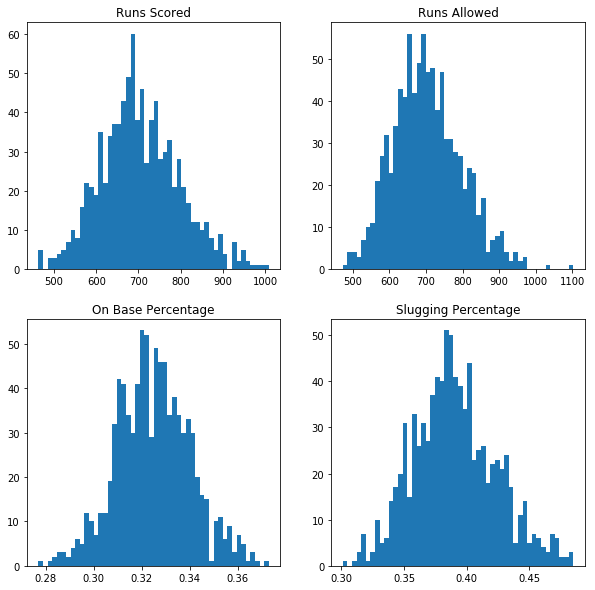

In [8]:
f, ax = plt.subplots(2,2)
ax[0,0].hist(moneyball.RS,bins = 50)
ax[0,0].set_title("Runs Scored")
ax[0,1].hist(moneyball.RA,bins = 50)
ax[0,1].set_title("Runs Allowed")
ax[1,0].hist(moneyball.OBP,bins = 50)
ax[1,0].set_title("On Base Percentage")
ax[1,1].hist(moneyball.SLG,bins = 50)
ax[1,1].set_title("Slugging Percentage")
f.subplots_adjust(hspace=0.2)
f.set_figheight(10)
f.set_figwidth(10)

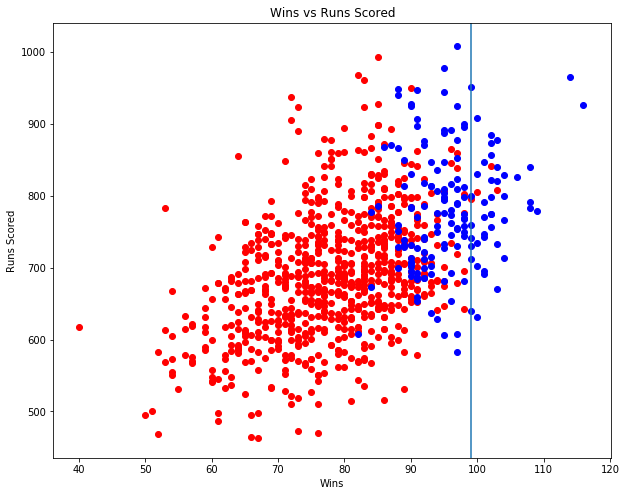

In [9]:
# Subsetting teams qualified for playoffs
moneyball1 = moneyball.loc[moneyball['Playoffs']==1]
moneyball0 = moneyball.loc[moneyball['Playoffs']==0]
# Plotting scatterplot
plt.figure(figsize=(10,8))
plt.scatter(x=moneyball0.W,y = moneyball0.RS,c="red")
plt.scatter(x=moneyball1.W,y = moneyball1.RS,c="blue")
plt.title("Wins vs Runs Scored")
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.axvline(x = 99)

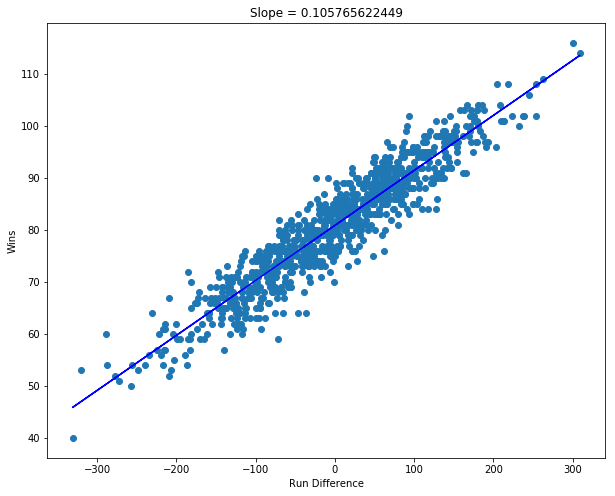

In [10]:
x = np.array(moneyball.RD)
y = np.array(moneyball.W)

# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Run Difference")
plt.ylabel("Wins")
plt.show()

In [11]:
print(np.corrcoef(x,y))

[[ 1.          0.93851498]
 [ 0.93851498  1.        ]]


## Part 2

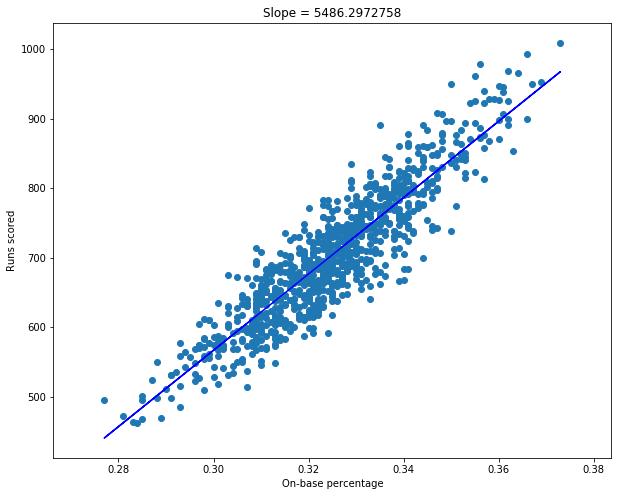

In [12]:
x = np.array(moneyball.OBP)
y = np.array(moneyball.RS)

# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("On-base percentage")
plt.ylabel("Runs scored")
plt.show()

In [13]:
print(np.corrcoef(moneyball.OBP,moneyball.RS))

[[ 1.          0.90490915]
 [ 0.90490915  1.        ]]


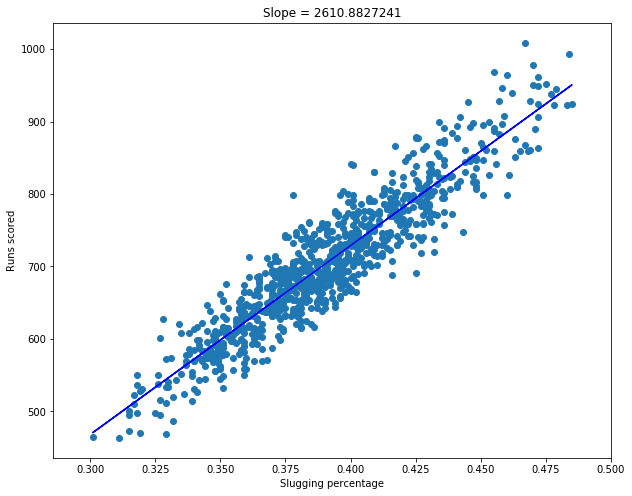

In [14]:
x = np.array(moneyball.SLG)
y = np.array(moneyball.RS)

# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Slugging percentage")
plt.ylabel("Runs scored")
plt.show()

In [15]:
print(np.corrcoef(moneyball.SLG,moneyball.RS))

[[ 1.          0.92638433]
 [ 0.92638433  1.        ]]


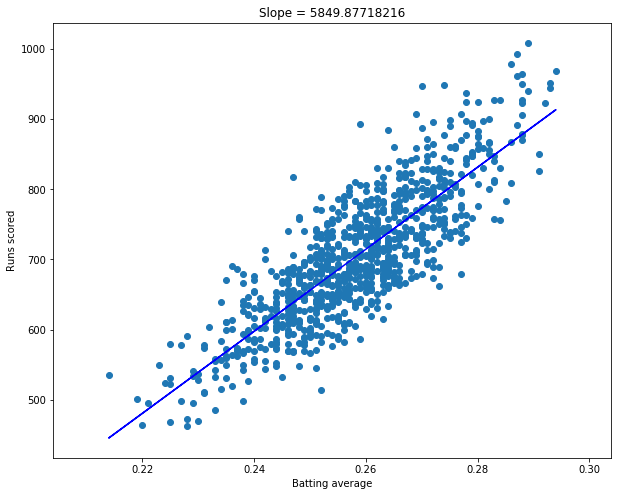

In [16]:
x = np.array(moneyball.BA)
y = np.array(moneyball.RS)

# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Batting average")
plt.ylabel("Runs scored")
plt.show()

In [17]:
print(np.corrcoef(moneyball.BA,moneyball.RS))

[[ 1.          0.83162475]
 [ 0.83162475  1.        ]]


In [18]:
moneyball.isnull().sum()
moneyball.drop(['RankSeason','RankPlayoffs'],axis = 1,inplace = True)



/Users/Banner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
moneyballnew = moneyball.dropna()
moneyballnew.head(5)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,161,0.329,0.393,27


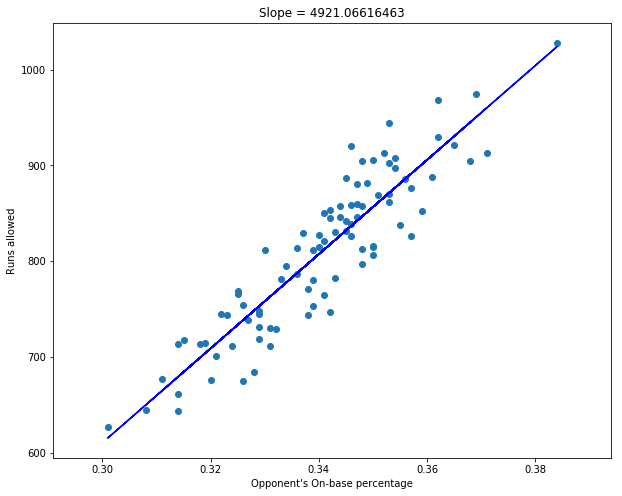

In [20]:
x = np.array(moneyballnew.OOBP)
y = np.array(moneyballnew.RA)

# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Opponent's On-base percentage")
plt.ylabel("Runs allowed")
plt.show()

In [21]:
print(np.corrcoef(moneyballnew.OOBP,moneyballnew.RA))

[[ 1.          0.90990783]
 [ 0.90990783  1.        ]]


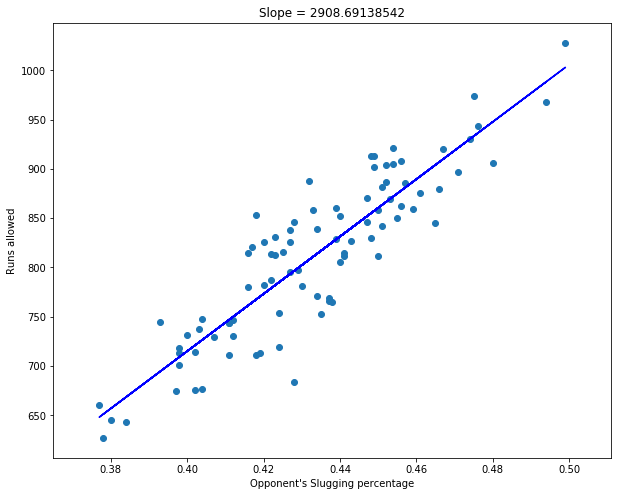

In [22]:
x = np.array(moneyballnew.OSLG)
y = np.array(moneyballnew.RA)

# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Opponent's Slugging percentage")
plt.ylabel("Runs allowed")
plt.show()

In [23]:
print(np.corrcoef(moneyballnew.OOBP,moneyballnew.RA))

[[ 1.          0.90990783]
 [ 0.90990783  1.        ]]


In [24]:
x = moneyball[['OBP','SLG','BA']].values
y = moneyball[['RS']].values

model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
print(model.intercept_)
print(model.coef_)

[-788.45704708]
[[ 2917.42140821  1637.92766577  -368.96606009]]


In [26]:
x = moneyball[['OBP','SLG']].values
y = moneyball[['RS']].values

RS_model = LinearRegression()
RS_model.fit(x,y)

print(RS_model.intercept_)
print(RS_model.coef_)

RS_model.predict([[0.339,0.430]])

[-804.62706106]
[[ 2737.76802227  1584.90860546]]


array([[ 804.98699884]])

In [27]:
x = moneyballnew[['OOBP','OSLG']].values
y = moneyballnew[['RA']].values
np.shape(x)

(90, 2)

In [28]:
RA_model = LinearRegression()
RA_model.fit(x,y)


array([[ 621.92581602]])

In [29]:
print(model.intercept_)
print(model.coef_)
RA_model.predict([[0.307,0.373]])

[-788.45704708]
[[ 2917.42140821  1637.92766577  -368.96606009]]


array([[ 621.92581602]])

In [31]:
x = moneyball[['RD']].values
y = moneyball[['W']].values

W_model = LinearRegression()
W_model.fit(x,y)

print(model.intercept_)
print(model.coef_)

W_model.predict([[183]])

[-788.45704708]
[[ 2917.42140821  1637.92766577  -368.96606009]]


array([[ 100.23648363]])